In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

# Data Import
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021 = df['carbon_intensity_avg']

df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly_2015 = df["De"]

costantCB = pd.read_csv(r'../data/CB_constant.csv')
adaptiveCB = pd.read_csv(r'../data/CB_adaptive.csv')


In [14]:
x = "CONSTANT_AVG_CB_"

carbonBudget = costantCB["AVGCarbonBudget"].values[0]

optimization_HH = pd.read_csv("../results/HH/optimizedCarbonAware/" + x + "optimization_result_HH.csv")
optimization_HL = pd.read_csv("../results/HL/optimizedCarbonAware/" + x + "optimization_result_HL.csv")
optimization_LH = pd.read_csv("../results/LH/optimizedCarbonAware/" + x + "optimization_result_LH.csv")
optimization_LL = pd.read_csv("../results/LL/optimizedCarbonAware/" + x + "optimization_result_LL.csv")

highPerformance_HH = pd.read_csv("../results/HH/highPerformanceBaseline_HH.csv")
highPerformance_HL = pd.read_csv("../results/HL/highPerformanceBaseline_HL.csv")
highPerformance_LH = pd.read_csv("../results/LH/highPerformanceBaseline_LH.csv")
highPerformance_LL = pd.read_csv("../results/LL/highPerformanceBaseline_LL.csv")

simpleCarbonAware_HH = pd.read_csv("../results/HH/simpleCarbonAware/" + x + "simpleCarbonAwareBaseline_HH.csv")
simpleCarbonAware_HL = pd.read_csv("../results/HL/simpleCarbonAware/" + x + "simpleCarbonAwareBaseline_HL.csv")
simpleCarbonAware_LH = pd.read_csv("../results/LH/simpleCarbonAware/" + x + "simpleCarbonAwareBaseline_LH.csv")
simpleCarbonAware_LL = pd.read_csv("../results/LL/simpleCarbonAware/" + x + "simpleCarbonAwareBaseline_LL.csv")

sequentialCarbonAware_HH = pd.read_csv("../results/HH/sequentialCarbonAware/" + x + "sequentialCarbonAwareBaseline_HH.csv")
sequentialCarbonAware_HL = pd.read_csv("../results/Hl/sequentialCarbonAware/" + x + "sequentialCarbonAwareBaseline_HL.csv")
sequentialCarbonAware_LH = pd.read_csv("../results/LH/sequentialCarbonAware/" + x + "sequentialCarbonAwareBaseline_LH.csv")
sequentialCarbonAware_LL = pd.read_csv("../results/LL/sequentialCarbonAware/" + x + "sequentialCarbonAwareBaseline_LL.csv")

a_HH = []
a_HL = []
a_LH = []
a_LL = []

b_HH = []
b_HL = []
b_LH = []
b_LL = []

c_HH = []
c_HL = []
c_LH = []
c_LL = []

d_HH = []
d_HL = []
d_LH = []
d_LL = []

ob_a_HH = 0
ob_b_HH = 0
ob_c_HH = 0
ob_d_HH = 0

ob_a_HL = 0
ob_b_HL = 0
ob_c_HL = 0
ob_d_HL = 0

ob_a_LH = 0
ob_b_LH = 0
ob_c_LH = 0
ob_d_LH = 0

ob_a_LL = 0
ob_b_LL = 0
ob_c_LL = 0
ob_d_LL = 0

ob_a = 0
ob_b = 0
ob_c = 0
ob_d = 0

a = []
b = []
c = []
d = []


In [15]:
for i in range(8760):

    a_HH.append(optimization_HH["ce"][i] / carbonBudget)
    a_HL.append(optimization_HL["ce"][i] / carbonBudget)
    a_LH.append(optimization_LH["ce"][i] / carbonBudget)
    a_LL.append(optimization_LL["ce"][i] / carbonBudget)

    b_HH.append((highPerformance_HH["Energy demand"][i] * ci_data_2021[i]) / carbonBudget)
    b_HL.append((highPerformance_HL["Energy demand"][i] * ci_data_2021[i]) / carbonBudget)
    b_LH.append((highPerformance_LH["Energy demand"][i] * ci_data_2021[i]) / carbonBudget)
    b_LL.append((highPerformance_LL["Energy demand"][i] * ci_data_2021[i]) / carbonBudget)

    c_HH.append(simpleCarbonAware_HH["ce"][i] / carbonBudget)
    c_HL.append(simpleCarbonAware_HL["ce"][i] / carbonBudget)
    c_LH.append(simpleCarbonAware_LH["ce"][i] / carbonBudget)
    c_LL.append(simpleCarbonAware_LL["ce"][i] / carbonBudget)

    d_HH.append(sequentialCarbonAware_HH["ce"][i] / carbonBudget)
    d_HL.append(sequentialCarbonAware_HL["ce"][i] / carbonBudget)
    d_LH.append(sequentialCarbonAware_LH["ce"][i] / carbonBudget)
    d_LL.append(sequentialCarbonAware_LL["ce"][i] / carbonBudget)

    a.append(mean([a_HH[i], a_HL[i], a_LH[i], a_LL[i]]))
    b.append(mean([b_HH[i], b_HL[i], b_LH[i], b_LL[i]]))
    c.append(mean([c_HH[i], c_HL[i], c_LH[i], c_LL[i]]))
    d.append(mean([d_HH[i], d_HL[i], d_LH[i], d_LL[i]]))

    if a_HH[i] > 1:
        ob_a_HH += 1
    if b_HH[i] > 1:
        ob_b_HH += 1
    if c_HH[i] > 1:
        ob_c_HH += 1
    if d_HH[i] > 1:
        ob_d_HH += 1

    if a_HL[i] > 1:
        ob_a_HL += 1
    if b_HL[i] > 1:
        ob_b_HL += 1
    if c_HL[i] > 1:
        ob_c_HL += 1
    if d_HL[i] > 1:
        ob_d_HL += 1

    if a_LH[i] > 1:
        ob_a_LH += 1
    if b_LH[i] > 1:
        ob_b_LH += 1
    if c_LH[i] > 1:
        ob_c_LH += 1
    if d_LH[i] > 1:
        ob_d_LH += 1

    if a_LL[i] > 1:
        ob_a_LL += 1
    if b_LL[i] > 1:
        ob_b_LL += 1
    if c_LL[i] > 1:
        ob_c_LL += 1
    if d_LL[i] > 1:
        ob_d_LL += 1

            
    if a[i] > 1:
        ob_a += 1
    if b[i] > 1:
        ob_b += 1
    if c[i] > 1:
        ob_c += 1
    if d[i] > 1:
        ob_d += 1

a = sorted(a)
b = sorted(b)
c = sorted(c)
d = sorted(d)

print(ob_a_HH, " ; " ,ob_b_HH, " ; " , ob_c_HH, " ; " , ob_d_HH)
print(ob_a_HL, " ; " ,ob_b_HL, " ; " , ob_c_HL, " ; " , ob_d_HL)
print(ob_a_LH, " ; " ,ob_b_LH, " ; " , ob_c_LH, " ; " , ob_d_LH)
print(ob_a_LL, " ; " ,ob_b_LL, " ; " , ob_c_LL, " ; " , ob_d_LL)
print(ob_a, " ; " , ob_b, " ; " , ob_c, " ; " , ob_d)

0  ;  2  ;  0  ;  0
0  ;  2  ;  0  ;  0
0  ;  4553  ;  0  ;  0
0  ;  4553  ;  0  ;  0
0  ;  1981  ;  0  ;  0


In [17]:
# Save plot
fig = CB_UtilisationPlot.get_figure()
fig.savefig("../img/" + x + "CB_Utilisation.png", bbox_inches = "tight")

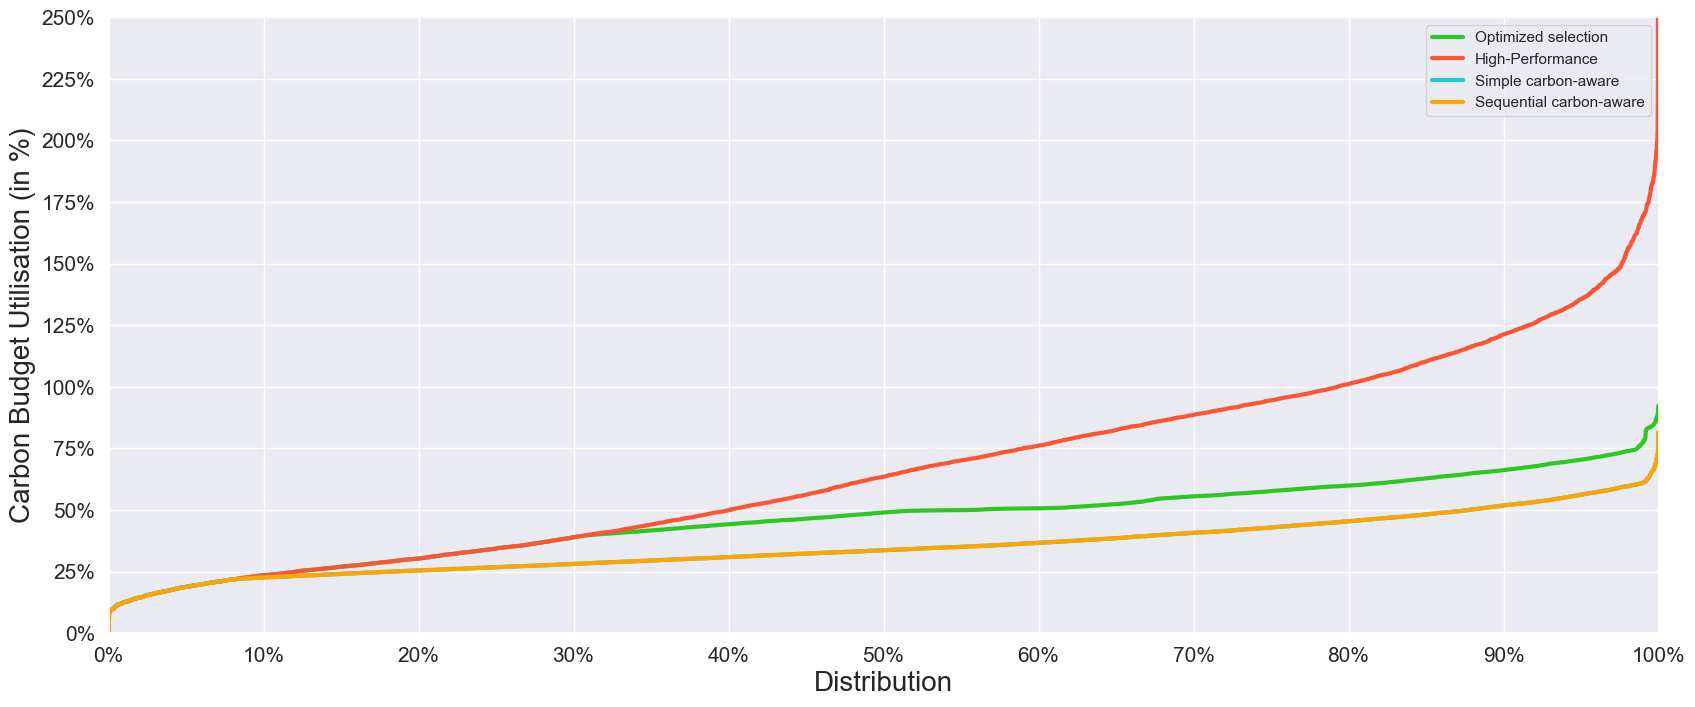

In [18]:
sns.set_theme(rc={'figure.figsize':(20, 8)})
'''
data = pd.DataFrame({'Selective Optimization Approach': a,'Selective Optimization Approach_HH': sorted(a_HH), 'Selective Optimization Approach_HL': sorted(a_HL), 'Selective Optimization Approach_LH': sorted(a_LH),
                     'Selective Optimization Approach_LL': sorted(a_LL),'Baseline High-Performance': b,'Baseline High-Performance_HH': sorted(b_HH), 'Baseline High-Performance_HL': sorted(b_HL),
                     'Baseline High-Performance_LH': sorted(b_LH),'Baseline High-Performance_LL':sorted(b_LL),'Simple carbon-aware': c,'Simple carbon-aware_HH': sorted(c_HH),'Simple carbon-aware_HL': sorted(c_HL),
                     'Simple carbon-aware_LH': sorted(c_LH), 'Simple carbon-aware_LL': sorted(c_LL), 'Sequential carbon-aware': d,'Sequential carbon-aware_HH': sorted(d_HH), 'Sequential carbon-aware_HL': sorted(d_HL),
                     'Sequential carbon-aware_LH': sorted(d_LH), 'Sequential carbon-aware_LL': sorted(d_LL)})
'''
data = pd.DataFrame({'Optimized selection': a,'High-Performance': b,'Simple carbon-aware': c,
                     'Sequential carbon-aware': d})

colors = ['#2CC820'] + ['#FB5534']  + ['#22CAD8'] + ['orange'] 
#lineW = ([10] + [1] * 4) * 4
#lineAlpha = ([1] + [0.3] * 4) * 4


y_upperLimit = 2.57

for i, (data_name, data) in enumerate(data.items()):
    CB_UtilisationPlot2 = sns.lineplot(data=data, linewidth=3, label=data_name, color=colors[i])
CB_UtilisationPlot2.set(xlim=(0,8760), ylim=(0,y_upperLimit))

xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]

CB_UtilisationPlot2.set_xticks(xlabels)
CB_UtilisationPlot2.set_xticklabels(percentage, fontdict={'size': 15})

y_labels = [str(int(x * 25)) + "%" for x in range(0, 11)]  # Adjust for integer labels if needed
y_ticks = np.linspace(0, y_upperLimit, len(y_labels))  # Create tick positions

CB_UtilisationPlot2.set_yticks(y_ticks)
CB_UtilisationPlot2.set_yticklabels(y_labels, fontdict={'size': 15})

CB_UtilisationPlot2.set_xlabel('Distribution', fontdict={'size': 20})
CB_UtilisationPlot2.set_ylabel('Carbon Budget Utilisation (in %)', fontdict={'size': 20})

# Save plot
fig = CB_UtilisationPlot2.get_figure()
fig.savefig("../img/temp/" + x + "CB_Utilisation.png", bbox_inches = "tight")

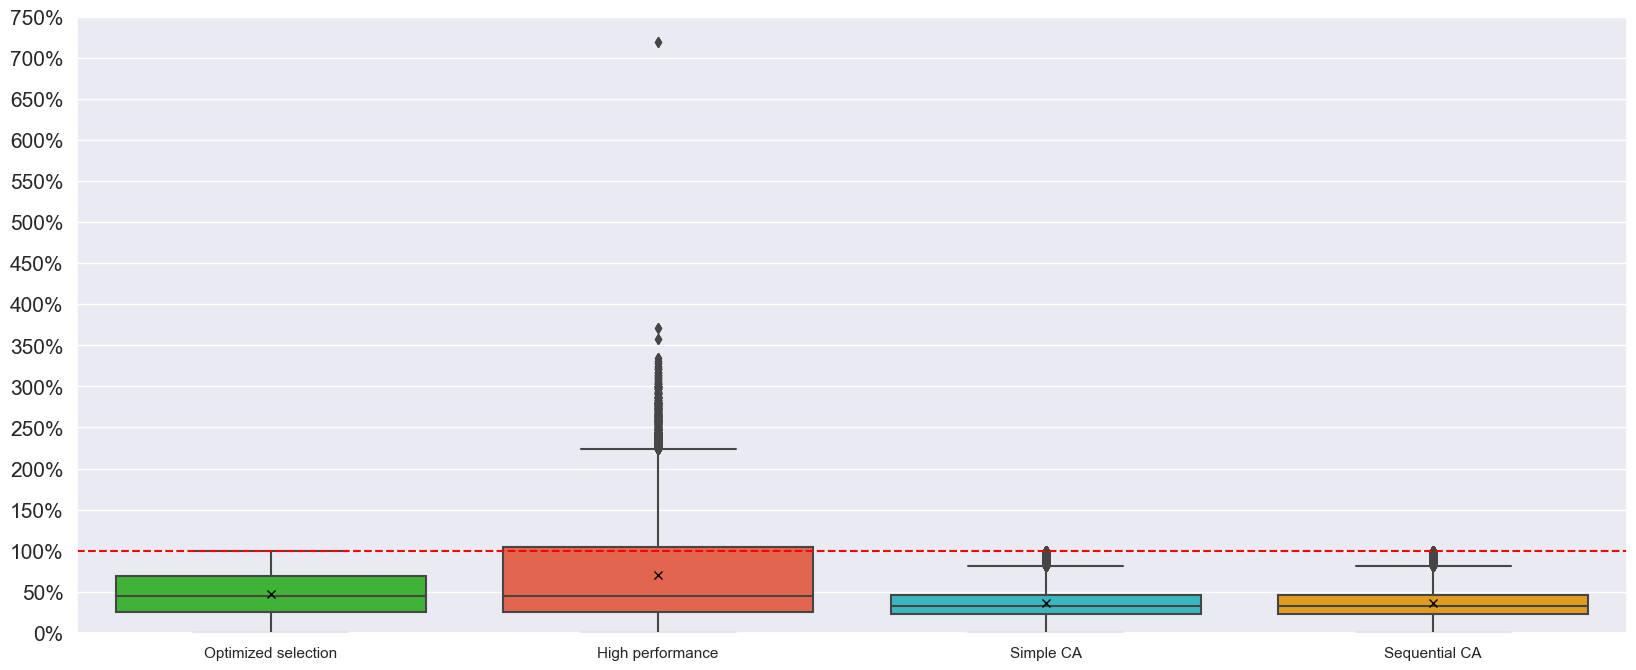

In [22]:
data = [a_HH + a_HL + a_LH + a_LL, b_HH + b_HL + b_LH + b_LL, c_HH + c_HL + c_LH + c_LL, d_HH + d_HL + d_LH + d_LL]

# Define a color palette for easy assignment
colors = ['#2CC820'] + ['#FB5534'] + ['#22CAD8'] + ['orange'] 

# Create the box plot with custom color assignment
boxplot = sns.boxplot(
    data=data,
    palette=colors,  # Use the defined color palette
    showmeans=True,
    meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}
)

y_upperLimit = 7.5
boxplot.set(ylim=(0, y_upperLimit))

plt.axhline(y=1, color='red', linestyle='--')

xlabels = ['Optimized selection', 'High performance','Simple CA', 'Sequential CA',]
boxplot.set_xticklabels(xlabels)

y_labels = [str(int(x * 50)) + "%" for x in range(0, 16)]  # Adjust for integer labels if needed
y_ticks = np.linspace(0, y_upperLimit, len(y_labels))  # Create tick positions

boxplot.set_yticks(y_ticks)
boxplot.set_yticklabels(y_labels, fontdict={'size': 15})


plt.show()

In [23]:
# Save plot
fig = boxplot.get_figure()
fig.savefig("../img/temp/" + x + "boxPlot.png", bbox_inches = "tight")